# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={weather_api_key}"
print(url)
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

     #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

https://api.openweathermap.org/data/2.5/weather?lat=[ 19.63687492  87.32952636 -80.40503344 ...  32.5993971   66.44969853
  10.85805715]&lon=[-166.95372793 -169.30918767  -54.60068062 ...  -52.35324467   47.90056465
  -12.05267226]&appid=626dc6b1c4a5fced902504a5ab8f855b
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lihue
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | bargara
City not found. Skipping...
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | ostroda
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | mount pearl
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | kingston
Proc

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lihue,21.9789,-159.3672,299.92,79,100,6.17,US,1731278602
1,bethel,41.3712,-73.4140,285.94,59,100,0.89,US,1731278603
2,stanley,54.8680,-1.6985,280.47,89,0,3.09,GB,1731278605
3,whitehorse,60.7161,-135.0538,273.16,74,100,5.66,CA,1731278606
4,adamstown,-25.0660,-130.1015,295.21,71,100,5.51,PN,1731278608


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,299.92,79,100,6.17,US,1731278602
1,bethel,41.3712,-73.4140,285.94,59,100,0.89,US,1731278603
2,stanley,54.8680,-1.6985,280.47,89,0,3.09,GB,1731278605
3,whitehorse,60.7161,-135.0538,273.16,74,100,5.66,CA,1731278606
4,adamstown,-25.0660,-130.1015,295.21,71,100,5.51,PN,1731278608


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

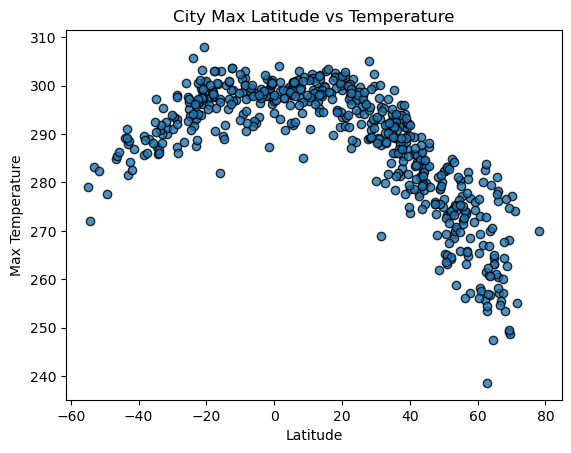

In [118]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolors = "black", linewidth = 1, marker = "o", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

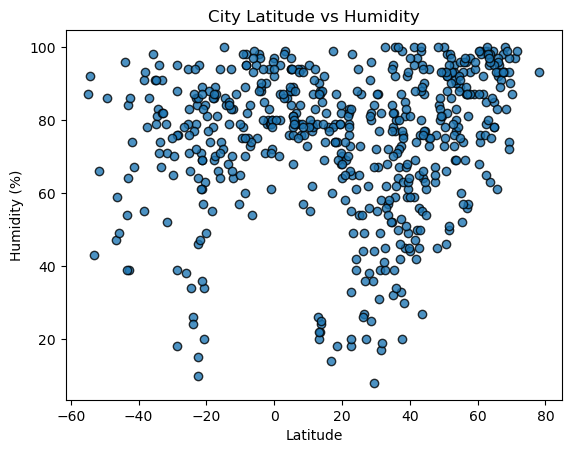

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolors = "black", linewidth = 1, marker = "o", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

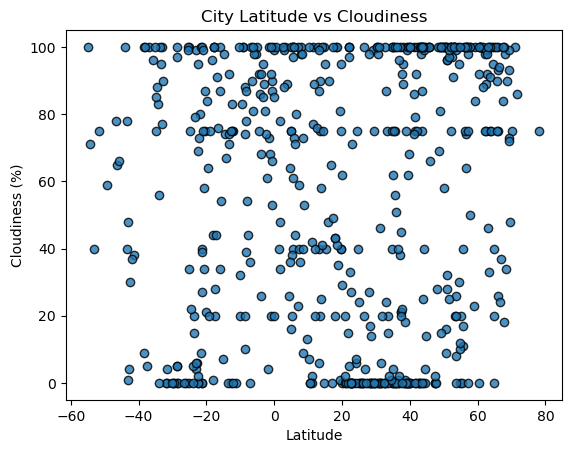

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolors = "black", linewidth = 1, marker = "o", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

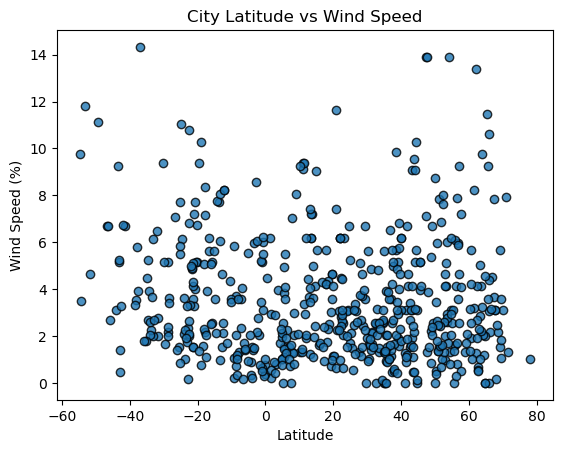

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolors = "black", linewidth = 1, marker = "o", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [101]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate (line_eq, text_coordinates, fontsize=10, color="red")
    plt.xlabel("Latitude")
    plt.title(title)
    print(f"The r^2 value is: {rvalue}")
    plt.show()

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,299.92,79,100,6.17,US,1731278602
1,bethel,41.3712,-73.4140,285.94,59,100,0.89,US,1731278603
2,stanley,54.8680,-1.6985,280.47,89,0,3.09,GB,1731278605
3,whitehorse,60.7161,-135.0538,273.16,74,100,5.66,CA,1731278606
5,ust-nera,64.5667,143.2000,247.51,99,95,1.21,RU,1731278609


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,295.21,71,100,5.51,PN,1731278608
9,atafu village,-8.5421,-172.5159,301.57,70,74,3.70,TK,1731278614
13,illapel,-31.6308,-71.1653,289.93,52,4,2.76,CL,1731278619
14,launceston,-41.4500,147.1667,286.95,67,38,6.69,AU,1731278621
20,cannonvale,-20.2833,148.7000,298.81,63,87,5.16,AU,1731278627


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: -0.863615920519171


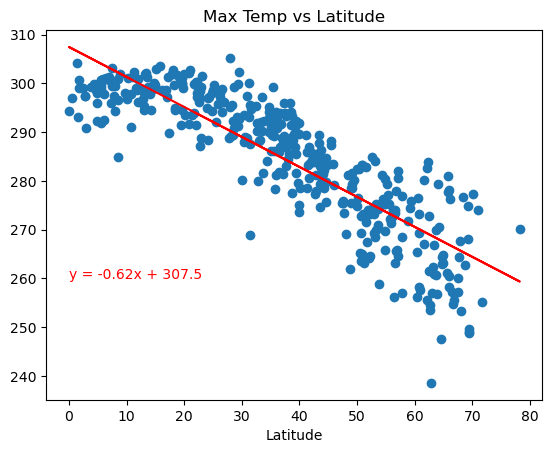

In [104]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp vs Latitude', (0,260))

The r^2 value is: 0.6962534194066426


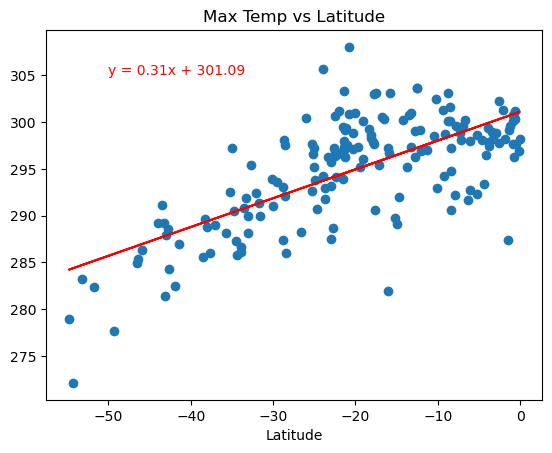

In [103]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp vs Latitude', (-50,305))

**Discussion about the linear relationship:** There is a linear relationship between max temperature and latitude, as evidenced by the R^2 values in both graphs. This means that the closer to the equator a country is, the warmer it will be. The further away a country is from the equator, the colder it will be.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.2150921503275601


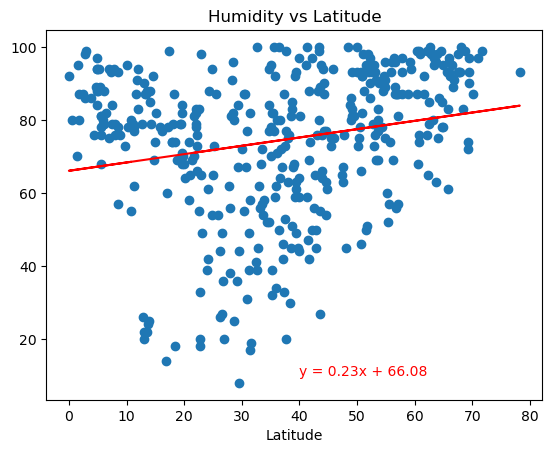

In [105]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity vs Latitude', (40,10))

The r^2 value is: 0.2375818353614013


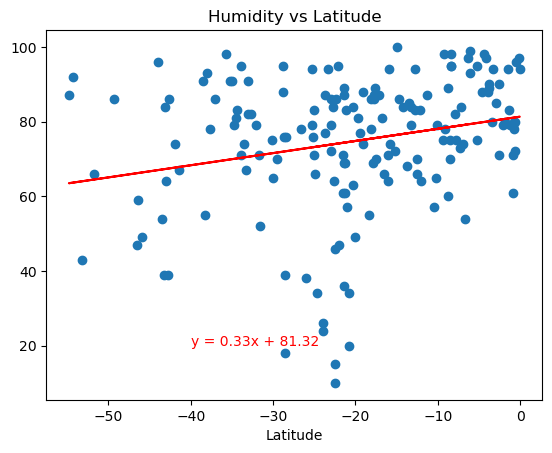

In [106]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity vs Latitude', (-40,20))

**Discussion about the linear relationship:** There is a very slight positive correlation between humidity and latitude. In the southern hemisphere, the closer you are to the equator, the more humid it will be. In the northern hemisphere, it will naturally be more humid than the south so it makes sense that most of the points are generally around the top of the graph.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.19137242626682385


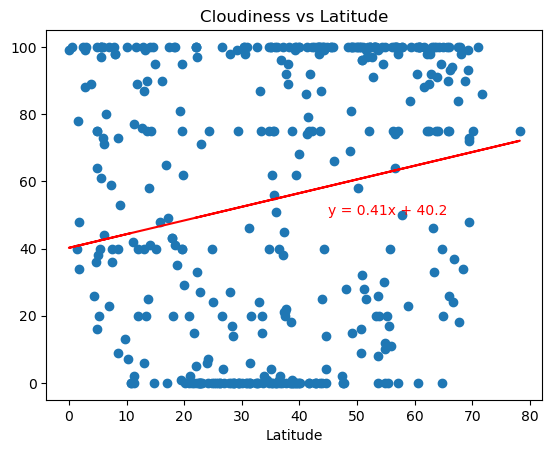

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness vs Latitude', (45,50))

The r^2 value is: 0.14375713765041623


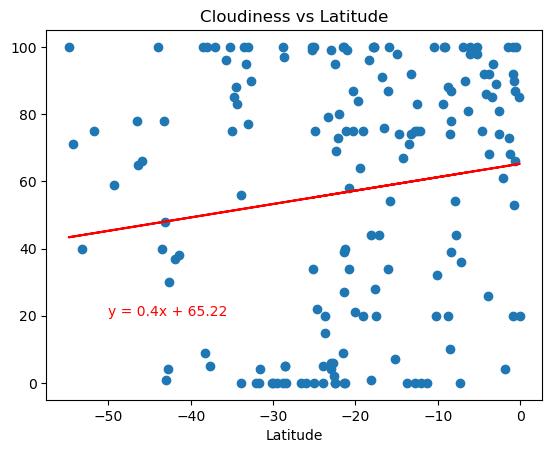

In [112]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness vs Latitude', (-50,20))

**Discussion about the linear relationship:** According to the R^2 values, there seems to be no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.07485364245835231


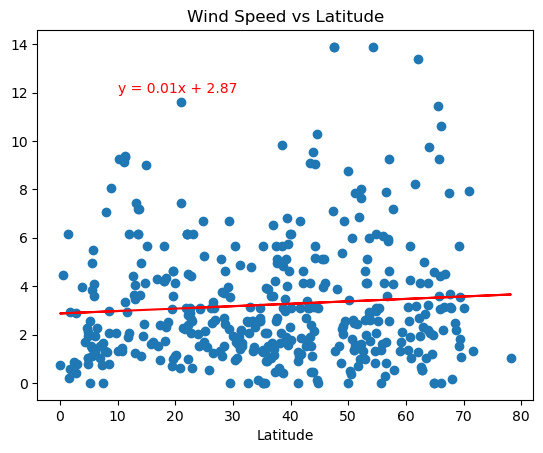

In [117]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed vs Latitude', (10,12))

The r^2 value is: -0.3023965915455057


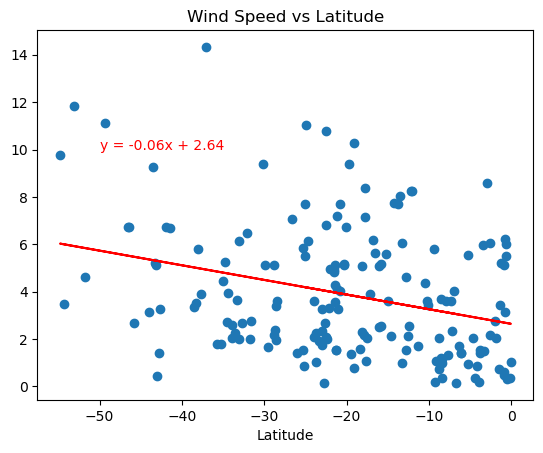

In [114]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed vs Latitude', (-50,10))

**Discussion about the linear relationship:** There seems to be a better correlation with wind speeds and latitudes in the southern hemisphere than the northern hemisphere. According to the graphs, the closer to the equator, the lower the wind speeds in the southern hemisphere. It seems to be generally low without dependence on latitude in the northern hemisphere.